In [ ]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/data_comp/03_JLeague/train/train.csv")
train_add = pd.read_csv("/content/drive/MyDrive/data_comp/03_JLeague/train/train_add.csv")
test = pd.read_csv("/content/drive/MyDrive/data_comp/03_JLeague/train/test.csv")
test_add = pd.read_csv("/content/drive/MyDrive/data_comp/03_JLeague/train/2014_add.csv")
condition = pd.read_csv("/content/drive/MyDrive/data_comp/03_JLeague/train/condition.csv")
condition_add = pd.read_csv("/content/drive/MyDrive/data_comp/03_JLeague/train/condition_add.csv")
stadium = pd.read_csv("/content/drive/MyDrive/data_comp/03_JLeague/train/stadium.csv")


In [ ]:
train.info()
train_add.info()
test.info()
test_add.info()
condition.info()
condition_add.info()
stadium.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1721 non-null   int64 
 1   y        1721 non-null   int64 
 2   year     1721 non-null   int64 
 3   stage    1721 non-null   object
 4   match    1721 non-null   object
 5   gameday  1721 non-null   object
 6   time     1721 non-null   object
 7   home     1721 non-null   object
 8   away     1721 non-null   object
 9   stadium  1721 non-null   object
 10  tv       1721 non-null   object
dtypes: int64(3), object(8)
memory usage: 148.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       232 non-null    int64 
 1   y        232 non-null    int64 
 2   year     232 non-null    int64 
 3   stage    232 non-null    object
 4   match    232 non-null    obj

In [ ]:
full_train = pd.concat([train, train_add], axis=0)
full_condition = pd.concat([condition, condition_add], axis=0)

In [ ]:
print("train concat")
print("before:", train.shape, train_add.shape)
print("after:", full_train.shape)

train concat
before: (1721, 11) (232, 11)
after: (1953, 11)


In [ ]:
print("condition concat")
print("before:", condition.shape, condition_add.shape)
print("after:", full_condition.shape)

condition concat
before: (2034, 31) (270, 31)
after: (2304, 31)


In [ ]:
stadium.head()

,name,address,capa
0,名古屋市瑞穂陸上競技場,愛知県名古屋市瑞穂区山下通5-1,20000
1,豊田スタジアム,愛知県豊田市千石町7-2,40000
2,フクダ電子アリーナ,千葉県千葉市中央区川崎町1-20,18500
3,日立柏サッカー場,千葉県柏市日立台1-2-50,15349
4,ニンジニアスタジアム,愛媛県松山市上野町乙46,15576


In [ ]:
stadium = stadium.rename(columns={'name': 'stadium'})
stadium = stadium[['stadium', 'capa']]

#　full_trainとfull_conditionはidを参照して結合
full_condition = full_condition[['id' ,'weather' ,'temperature' ,'humidity']]

In [ ]:
full_condition.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2304 entries, 0 to 269
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2304 non-null   int64  
 1   weather      2304 non-null   object 
 2   temperature  2304 non-null   float64
 3   humidity     2304 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 90.0+ KB


In [ ]:
# merge

full_train = pd.merge(full_train, stadium, on='stadium',  how='left')
full_train = pd.merge(full_train, full_condition, on='id',  how='left')
full_test = pd.merge(test, stadium, on='stadium',  how='left')
full_test = pd.merge(full_test, full_condition, on='id',  how='left')

In [ ]:
display(full_train.head(), full_test.head())
print('full_train shape: ', full_train.shape)
print('full_test shape: ', full_test.shape)

,id,y,year,stage,match,gameday,time,home,away,stadium,tv,capa,weather,temperature,humidity
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合,19694,雨,3.8,66%
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋,40000,屋内,12.4,43%
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪,21000,晴一時雨,11.3,41%
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島,50000,曇一時雨のち晴,11.4,52%
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌,39232,屋内,22.5,32%


,id,year,stage,match,gameday,time,home,away,stadium,tv,capa,weather,temperature,humidity
0,15822,2014,Ｊ１,第１８節第１日,08/02(土),19:04,ベガルタ仙台,大宮アルディージャ,ユアテックスタジアム仙台,スカパー！／スカパー！プレミアムサービス,19694,晴,27.4,70%
1,15823,2014,Ｊ１,第１８節第１日,08/02(土),18:34,鹿島アントラーズ,サンフレッチェ広島,県立カシマサッカースタジアム,スカパー！／スカパー！プレミアムサービス,40728,晴,30.8,65%
2,15824,2014,Ｊ１,第１８節第１日,08/02(土),19:04,浦和レッズ,ヴィッセル神戸,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／ＮＨＫ ＢＳ１／テレ玉,63700,晴,31.7,58%
3,15825,2014,Ｊ１,第１８節第１日,08/02(土),19:03,柏レイソル,川崎フロンターレ,日立柏サッカー場,スカパー！／スカパー！プレミアムサービス,15349,晴,29.3,76%
4,15827,2014,Ｊ１,第１８節第１日,08/02(土),19:03,アルビレックス新潟,セレッソ大阪,デンカビッグスワンスタジアム,スカパー！／スカパー！プレミアムサービス,42300,晴,30.4,68%


full_train shape:  (1953, 15)
full_test shape:  (313, 14)


In [ ]:
# 欠損値の確認
full_train.isnull().sum()

id             0
y              0
year           0
stage          0
match          0
gameday        0
time           0
home           0
away           0
stadium        0
tv             0
capa           0
weather        0
temperature    0
humidity       0
dtype: int64

In [ ]:
# 欠損値の確認
full_test.isnull().sum()

id             0
year           0
stage          0
match          0
gameday        0
time           0
home           0
away           0
stadium        0
tv             0
capa           0
weather        0
temperature    0
humidity       0
dtype: int64

In [ ]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953 entries, 0 to 1952
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1953 non-null   int64  
 1   y            1953 non-null   int64  
 2   year         1953 non-null   int64  
 3   stage        1953 non-null   object 
 4   match        1953 non-null   object 
 5   gameday      1953 non-null   object 
 6   time         1953 non-null   object 
 7   home         1953 non-null   object 
 8   away         1953 non-null   object 
 9   stadium      1953 non-null   object 
 10  tv           1953 non-null   object 
 11  capa         1953 non-null   int64  
 12  weather      1953 non-null   object 
 13  temperature  1953 non-null   float64
 14  humidity     1953 non-null   object 
dtypes: float64(1), int64(4), object(10)
memory usage: 229.0+ KB


In [ ]:
full_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           313 non-null    int64  
 1   year         313 non-null    int64  
 2   stage        313 non-null    object 
 3   match        313 non-null    object 
 4   gameday      313 non-null    object 
 5   time         313 non-null    object 
 6   home         313 non-null    object 
 7   away         313 non-null    object 
 8   stadium      313 non-null    object 
 9   tv           313 non-null    object 
 10  capa         313 non-null    int64  
 11  weather      313 non-null    object 
 12  temperature  313 non-null    float64
 13  humidity     313 non-null    object 
dtypes: float64(1), int64(3), object(10)
memory usage: 34.4+ KB


In [ ]:
##　前処理
full_train.select_dtypes(include=object).head()

,stage,match,gameday,time,home,away,stadium,tv,weather,humidity
0,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合,雨,66%
1,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋,屋内,43%
2,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪,晴一時雨,41%
3,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島,曇一時雨のち晴,52%
4,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌,屋内,32%


In [ ]:
# match
# 第○節の数字をsectionとして取り出す,lambda（無名関数）

full_train['section'] = full_train['match'].apply(lambda x: x.split('節')[0][1:]).astype(int)
full_test['section'] = full_test['match'].apply(lambda x: x.split('節')[0][1:]).astype(int)

In [ ]:
# gamedayから月と曜日を取り出す
full_train['month'] = full_train['gameday'].apply(lambda x: x[:2]).astype(int)
full_train['weekday'] = full_train['gameday'].apply(lambda x: x[6])
full_test['month'] = full_test['gameday'].apply(lambda x: x[:2]).astype(int)
full_test['weekday'] = full_test['gameday'].apply(lambda x: x[6])

In [ ]:
# timeから時間を取り出す
full_train['kickoff'] = full_train['time'].apply(lambda x: x.split(':')[0]).astype(int)
full_test['kickoff'] = full_test['time'].apply(lambda x: x.split(':')[0]).astype(int)

In [ ]:
# tvからサービスの数をカウント
full_train['tv'] = full_train['tv'].apply(lambda x: len(x.split('／')))
full_test['tv'] = full_test['tv'].apply(lambda x: len(x.split('／')))

In [ ]:
# humidityから％を切り取り数値データに変換
full_train['humidity'] = full_train['humidity'].apply(lambda x: x.rstrip('%')).astype(int)
full_test['humidity'] = full_test['humidity'].apply(lambda x: x.rstrip('%')).astype(int)

In [ ]:
# stageから数値を取り出す
full_train['stage'] = full_train['stage'].apply(lambda x: x[1:]).astype(int)
full_test['stage'] = full_test['stage'].apply(lambda x: x[1:]).astype(int)

In [ ]:
# 完成したデータを確認
display(full_train.head(3), full_test.head(3))

,id,y,year,stage,match,gameday,time,home,away,stadium,tv,capa,weather,temperature,humidity,section,month,weekday,kickoff
0,13994,18250,2012,1,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,4,19694,雨,3.8,66,1,3,土,14
1,13995,24316,2012,1,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,4,40000,屋内,12.4,43,1,3,土,14
2,13996,17066,2012,1,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,4,21000,晴一時雨,11.3,41,1,3,土,14


,id,year,stage,match,gameday,time,home,away,stadium,tv,capa,weather,temperature,humidity,section,month,weekday,kickoff
0,15822,2014,1,第１８節第１日,08/02(土),19:04,ベガルタ仙台,大宮アルディージャ,ユアテックスタジアム仙台,2,19694,晴,27.4,70,18,8,土,19
1,15823,2014,1,第１８節第１日,08/02(土),18:34,鹿島アントラーズ,サンフレッチェ広島,県立カシマサッカースタジアム,2,40728,晴,30.8,65,18,8,土,18
2,15824,2014,1,第１８節第１日,08/02(土),19:04,浦和レッズ,ヴィッセル神戸,埼玉スタジアム２００２,4,63700,晴,31.7,58,18,8,土,19


In [ ]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953 entries, 0 to 1952
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1953 non-null   int64  
 1   y            1953 non-null   int64  
 2   year         1953 non-null   int64  
 3   stage        1953 non-null   int64  
 4   match        1953 non-null   object 
 5   gameday      1953 non-null   object 
 6   time         1953 non-null   object 
 7   home         1953 non-null   object 
 8   away         1953 non-null   object 
 9   stadium      1953 non-null   object 
 10  tv           1953 non-null   int64  
 11  capa         1953 non-null   int64  
 12  weather      1953 non-null   object 
 13  temperature  1953 non-null   float64
 14  humidity     1953 non-null   int64  
 15  section      1953 non-null   int64  
 16  month        1953 non-null   int64  
 17  weekday      1953 non-null   object 
 18  kickoff      1953 non-null   int64  
dtypes: flo

In [ ]:
full_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           313 non-null    int64  
 1   year         313 non-null    int64  
 2   stage        313 non-null    int64  
 3   match        313 non-null    object 
 4   gameday      313 non-null    object 
 5   time         313 non-null    object 
 6   home         313 non-null    object 
 7   away         313 non-null    object 
 8   stadium      313 non-null    object 
 9   tv           313 non-null    int64  
 10  capa         313 non-null    int64  
 11  weather      313 non-null    object 
 12  temperature  313 non-null    float64
 13  humidity     313 non-null    int64  
 14  section      313 non-null    int64  
 15  month        313 non-null    int64  
 16  weekday      313 non-null    object 
 17  kickoff      313 non-null    int64  
dtypes: float64(1), int64(9), object(8)
memory usage: 4

In [ ]:
full_train.describe()

,id,y,year,stage,tv,capa,temperature,humidity,section,month,kickoff
count,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000
mean,15049.442396,10629.558116,2012.820276,1.608295,2.656938,25688.549411,20.438914,60.220174,18.050691,6.316948,16.310804
std,646.260483,8102.315189,0.758124,0.488256,0.715085,14016.934408,6.438737,19.953138,11.153364,2.500493,2.310252
min,13994.000000,0.000000,2012.000000,1.000000,1.000000,3560.000000,1.400000,12.000000,1.000000,3.000000,12.000000
25%,14482.000000,4687.000000,2012.000000,1.000000,2.000000,15589.000000,15.800000,44.000000,9.000000,4.000000,14.000000
50%,15044.000000,8594.000000,2013.000000,2.000000,3.000000,20246.000000,21.400000,63.000000,17.000000,6.000000,16.000000
75%,15532.000000,13471.000000,2013.000000,2.000000,3.000000,30132.000000,25.600000,77.000000,27.000000,8.000000,19.000000
max,16238.000000,62632.000000,2014.000000,2.000000,5.000000,72327.000000,34.200000,99.000000,42.000000,12.000000,20.000000


In [ ]:
full_test.describe()

,id,year,stage,tv,capa,temperature,humidity,section,month,kickoff
count,313.000000,313.0,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,16142.252396,2014.0,1.555911,2.380192,26493.354633,21.666773,64.894569,30.162939,9.418530,16.664537
std,224.441223,0.0,0.497660,0.609111,14237.841998,5.073073,17.748557,6.249792,1.179652,2.300903
min,15822.000000,2014.0,1.000000,2.000000,7258.000000,1.300000,19.000000,18.000000,8.000000,12.000000
25%,15907.000000,2014.0,1.000000,2.000000,15600.000000,19.000000,51.000000,26.000000,8.000000,14.000000
50%,16261.000000,2014.0,2.000000,2.000000,20396.000000,22.600000,66.000000,30.000000,9.000000,18.000000
75%,16346.000000,2014.0,2.000000,3.000000,32000.000000,25.200000,79.000000,34.000000,10.000000,19.000000
max,16436.000000,2014.0,2.000000,5.000000,72327.000000,31.700000,99.000000,42.000000,12.000000,19.000000


In [ ]:
#　無観客試合のデータを確認(yが0)
full_train[full_train['y']==0]

,id,y,year,stage,match,gameday,time,home,away,stadium,tv,capa,weather,temperature,humidity,section,month,weekday,kickoff
1385,15699,0,2014,1,第４節第１日,03/23(日),15:04,浦和レッズ,清水エスパルス,埼玉スタジアム２００２,3,63700,晴,16.2,23,4,3,日,15


In [ ]:
full_train.drop(index=1385, inplace=True)
full_train[full_train['y']==0]

,id,y,year,stage,match,gameday,time,home,away,stadium,tv,capa,weather,temperature,humidity,section,month,weekday,kickoff


In [ ]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1952 entries, 0 to 1952
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1952 non-null   int64  
 1   y            1952 non-null   int64  
 2   year         1952 non-null   int64  
 3   stage        1952 non-null   int64  
 4   match        1952 non-null   object 
 5   gameday      1952 non-null   object 
 6   time         1952 non-null   object 
 7   home         1952 non-null   object 
 8   away         1952 non-null   object 
 9   stadium      1952 non-null   object 
 10  tv           1952 non-null   int64  
 11  capa         1952 non-null   int64  
 12  weather      1952 non-null   object 
 13  temperature  1952 non-null   float64
 14  humidity     1952 non-null   int64  
 15  section      1952 non-null   int64  
 16  month        1952 non-null   int64  
 17  weekday      1952 non-null   object 
 18  kickoff      1952 non-null   int64  
dtypes: float64(

In [ ]:
##　可視化
full_train[["id", "y", "year", "stage", "section", "tv", "capa", "temperature", "humidity", "month", "kickoff"]].corr()

,id,y,year,stage,section,tv,capa,temperature,humidity,month,kickoff
id,1.000000,-0.176920,0.942649,0.306987,-0.032474,-0.537001,-0.111546,0.050131,-0.123654,-0.097166,-0.089048
y,-0.176920,1.000000,0.003211,-0.669857,-0.044138,0.142387,0.688290,-0.028072,-0.100557,0.105861,0.029106
year,0.942649,0.003211,1.000000,0.022484,-0.258279,-0.496281,0.014548,-0.040849,-0.196105,-0.259396,-0.106942
stage,0.306987,-0.669857,0.022484,1.000000,0.161299,-0.123651,-0.430006,0.050312,0.053273,-0.048949,-0.087256
section,-0.032474,-0.044138,-0.258279,0.161299,1.000000,-0.093259,-0.088082,0.427351,0.304965,0.957339,0.204839
tv,-0.537001,0.142387,-0.496281,-0.123651,-0.093259,1.000000,0.071603,-0.092931,0.004395,-0.072669,-0.103685
capa,-0.111546,0.688290,0.014548,-0.430006,-0.088082,0.071603,1.000000,-0.031298,-0.068175,0.006253,0.021499
temperature,0.050131,-0.028072,-0.040849,0.050312,0.427351,-0.092931,-0.031298,1.000000,0.192701,0.381236,0.366617
humidity,-0.123654,-0.100557,-0.196105,0.053273,0.304965,0.004395,-0.068175,0.192701,1.000000,0.295952,0.459585
month,-0.097166,0.105861,-0.259396,-0.048949,0.957339,-0.072669,0.006253,0.381236,0.295952,1.000000,0.218918


In [ ]:
!pip install japanize-matplotlib
import matplotlib
import japanize_matplotlib
matplotlib.rcParams["font.family"] = "IPAexGothic"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 27.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=050b5f7a2f715628fef9c765377266375fe484c9689be6cd7a57162012d1ee4b
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


ValueError: could not convert string to float: '第１節第１日'

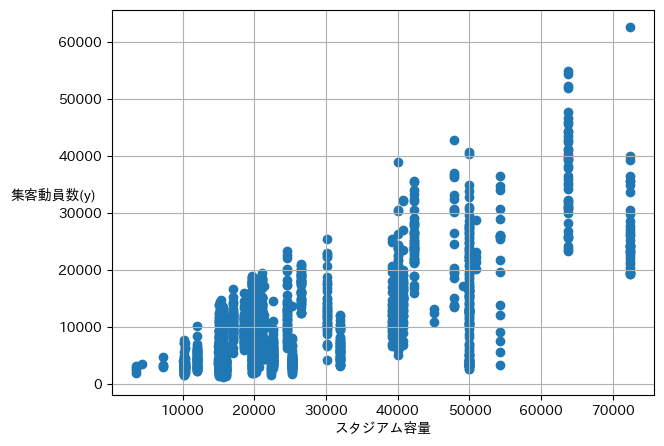

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(x=full_train['capa'], y=full_train['y'])
plt.grid()
plt.xlabel('スタジアム容量')
plt.ylabel('集客動員数(y)', rotation=0)
plt.title('yとcapaの相関係数:{}'.format(round(full_train.corr()['y']['capa'], 4)))
plt.show()

ValueError: could not convert string to float: '第１節第１日'

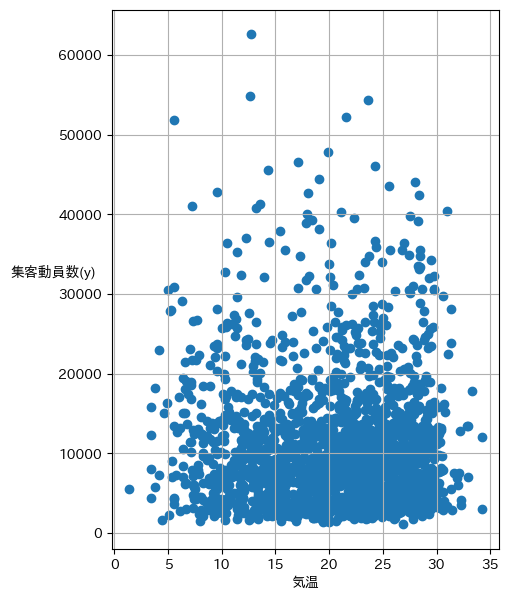

In [ ]:
plt.figure(figsize=(5, 7))
plt.scatter(x=full_train['temperature'], y=full_train['y'])
plt.grid()
plt.xlabel('気温')
plt.ylabel('集客動員数(y)', rotation=0)
plt.title('yとtemperatureの相関係数:{}'.format(round(full_train.corr()['y']['temperature'], 4)))
plt.show()

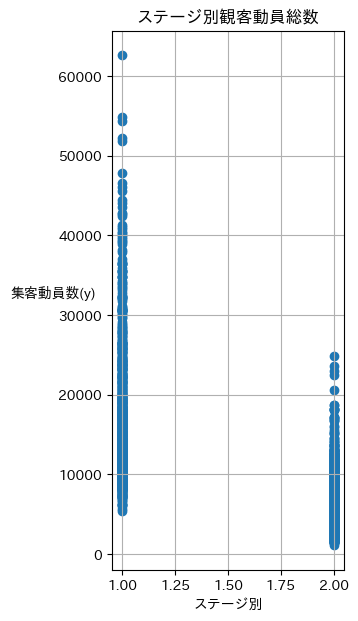

In [ ]:
plt.figure(figsize=(3, 7))
plt.scatter(x=full_train['stage'], y=full_train['y'])
plt.grid()
plt.xlabel('ステージ別')
plt.ylabel('集客動員数(y)', rotation=0)
plt.title('ステージ別観客動員総数')
plt.show()

ValueError: could not convert string to float: '第１節第１日'

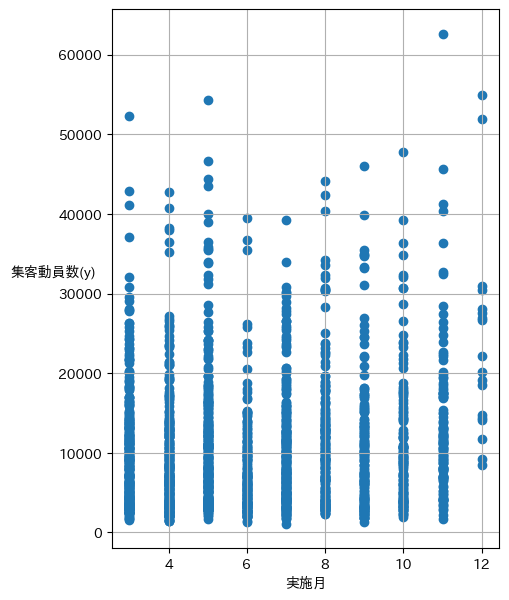

In [ ]:
plt.figure(figsize=(5, 7))
plt.scatter(x=full_train['month'], y=full_train['y'])
plt.grid()
plt.xlabel('実施月')
plt.ylabel('集客動員数(y)', rotation=0)
plt.title('yとmonthの相関係数:{}'.format(round(full_train.corr()['y']['month'], 4)))
plt.show()

ValueError: could not convert string to float: '第１節第１日'

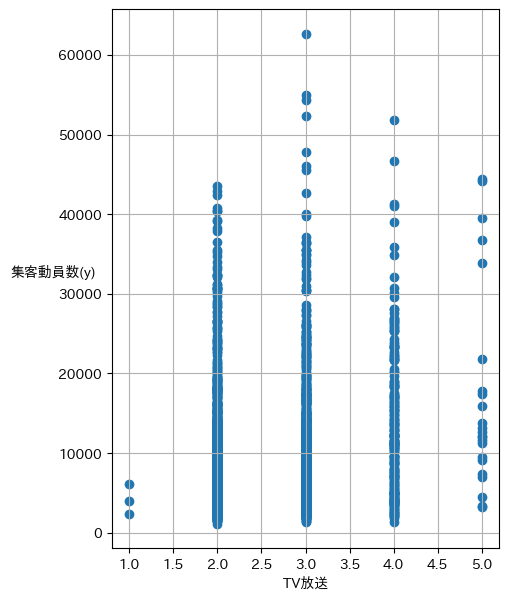

In [ ]:
plt.figure(figsize=(5, 7))
plt.scatter(x=full_train['tv'], y=full_train['y'])
plt.grid()
plt.xlabel('TV放送')
plt.ylabel('集客動員数(y)', rotation=0)
plt.title('yとtvの相関係数:{}'.format(round(full_train.corr()['y']['tv'], 4)))
plt.show()

In [ ]:
!pip install japanize-matplotlib

In [ ]:
import matplotlib
import japanize_matplotlib

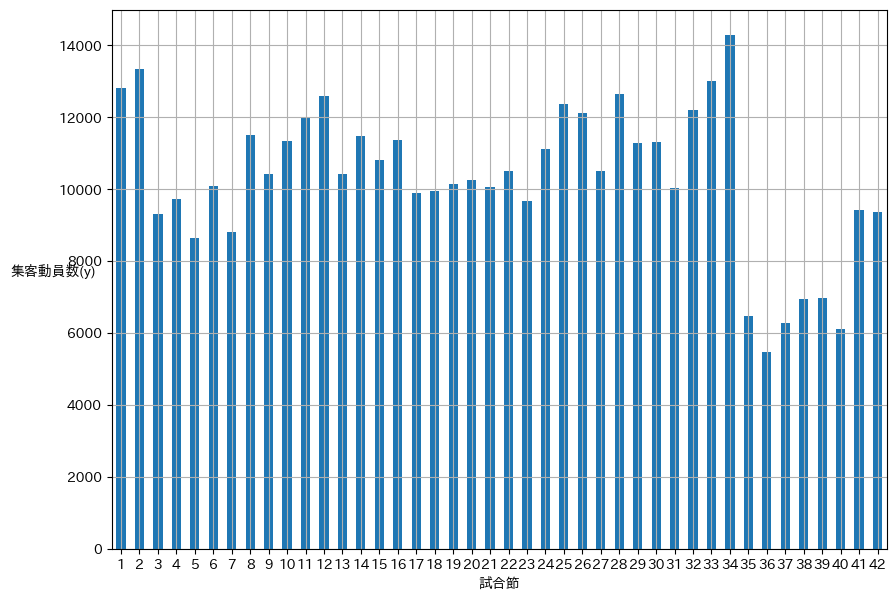

In [ ]:
plt.figure(figsize=(10, 7))
full_train.groupby('section')['y'].mean().plot.bar()
plt.grid()
plt.xlabel('試合節')
plt.xticks(rotation=0)
plt.ylabel('集客動員数(y)', rotation=0)
plt.show()

#　シーズン後半の方が盛り上がりそう
#　35~40はなんでこんなに減る？

In [ ]:
print('section35~40の6section分の試合数 : ', len(full_train.query('35<=section<=40')), '平均観客数 : ', full_train.query('35<=section<=40')['y'].mean())
print('section29~34の6section分の試合数 : ', len(full_train.query('29<=section<=34')), '平均観客数 : ', full_train.query('29<=section<=34')['y'].mean())

#　試合数約半減
#　平均観客数も半減

section35~40の6section分の試合数 :  132 平均観客数 :  6373.037878787879
section29~34の6section分の試合数 :  240 平均観客数 :  12023.55


In [ ]:
full_train.query('35<=section<=40').stage.value_counts()

stage
2    132
Name: count, dtype: int64

In [ ]:
full_train.query('29<=section<=34').stage.value_counts()

stage
2    132
1    108
Name: count, dtype: int64

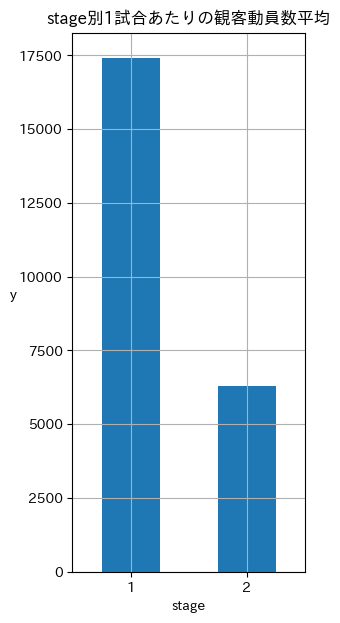

In [ ]:
plt.figure(figsize=(3, 7))
full_train.groupby('stage')['y'].mean().plot.bar()
plt.grid()
plt.xticks(rotation=0)
plt.ylabel('y', rotation=0)
plt.title('stage別1試合あたりの観客動員数平均')
plt.show()

#　J1の方がJ2より2.5倍ほどy（観客動員数）が多い

In [ ]:
full_train["stage"].value_counts()

stage
2    1188
1     764
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21029 (\N{CJK UNIFIED IDEOGRAPH-5225}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


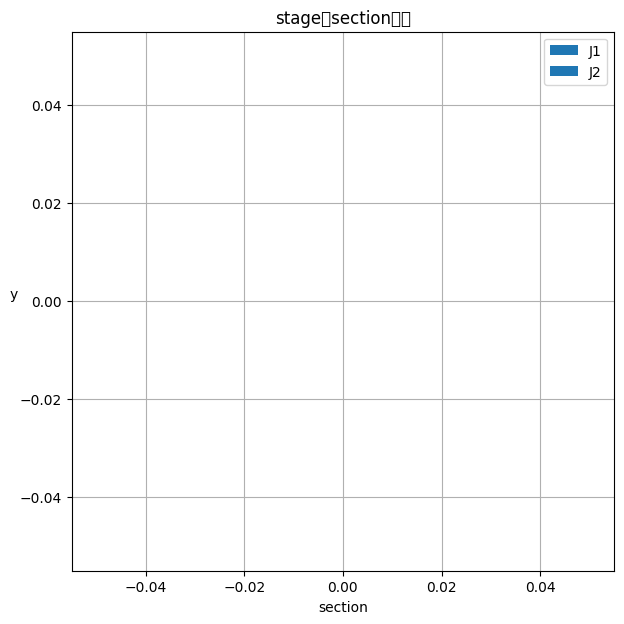

In [ ]:
plt.figure(figsize=(7, 7))
J1_group = full_train[full_train['stage'] == '2'].groupby('section')['y'].mean()
J2_group = full_train[full_train['stage'] == '1'].groupby('section')['y'].mean()
plt.bar(J1_group.index, J1_group, label='J1')
plt.bar(J2_group.index, J2_group, label='J2', align='edge')
plt.legend()
plt.grid()
plt.xlabel('section')
plt.ylabel('y', rotation=0)
plt.title('stage別section分布')
plt.show()

# J1の試合はsection34で終了。section35以降はyの数値が大きく減少。

In [ ]:
# 学習に使用する特徴量の選択
use_columns = ['capa', 'section', 'stage', 'month', 'kickoff', 'tv']
y = full_train['y']
train = full_train[use_columns]
test = full_test[use_columns]

In [ ]:
#カテゴリ変数のダミー変数化
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [ ]:
# 学習データと検証データに分割
X_train, X_valid, y_train, y_valid = train_test_split(train, y, random_state = 82)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(1464, 6) (488, 6) (1464,) (488,)


In [ ]:
# AIモデル学習
# ランダムフォレストとは、複数の決定木の出力を組み合わせて1つの結果に到達する。分類と回帰の両方の問題を処理するランダム・フォレストは、その使いやすさと柔軟性により広く採用されています。（https://www.ibm.com/jp-ja/topics/random-forest）
rfr = RandomForestRegressor(random_state=82)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=82)

In [ ]:
# 予測・精度評価
y_pred_train = rfr.predict(X_train)
rmse_train = np.sqrt(MSE(y_train, y_pred_train))

y_pred_valid = rfr.predict(X_valid)
rmse_valid = np.sqrt(MSE(y_valid, y_pred_valid))

print('学習データの予測精度', rmse_train)
print('評価データの予測精度', rmse_valid)

学習データの予測精度 1445.5411231479288
評価データの予測精度 3899.404351126758


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32318 (\N{CJK UNIFIED IDEOGRAPH-7E3E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


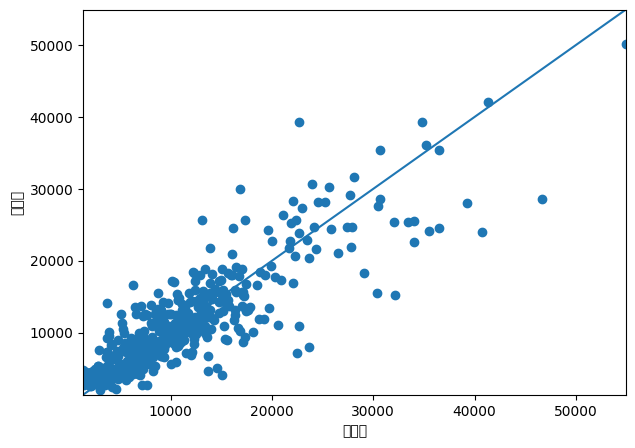

In [ ]:
# 予測の可視化
plt.figure(figsize=(7, 5))
plt.scatter(y_valid, y_pred_valid)

min_value = min(y_valid.min(), y_pred_valid.min())
max_value = max(y_valid.max(), y_pred_valid.max())

plt.xlim([min_value,max_value])
plt.ylim([min_value,max_value])
plt.plot([min_value,max_value],[min_value,max_value])

plt.xlabel('実績値')
plt.ylabel('予測値')
plt.show()

In [ ]:
# 予測
predict = rfr.predict(test)

In [ ]:
# sample_submitの読み込み
submit = pd.read_csv('/content/drive/MyDrive/data_comp/03_JLeague/sample_submit.csv', header=None)

# 予測結果の適用
submit[1] = predict
submit.to_csv('/content/drive/MyDrive/data_comp/03_JLeague/submission_tutorial.csv', header=None, index=False)

In [ ]:
submit.head()

,0,1
0,15822,13942.49
1,15823,16623.51
2,15824,28615.25
3,15825,9426.15
4,15827,21961.54
